In [1]:
# Assigment 1

# IMPORT LIBRARIES & DATASETS

import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
# Load GDP VS Life expectency 

# Get dataset
df = pd.read_csv('datasets/life-expectancy-years-vs-real-gdp-per-capita-2011us.csv', delimiter=',')
print('Original DataFrame length:', len(df))

# Same dataset
my_data = pd.read_csv('datasets/life-expectancy-years-vs-real-gdp-per-capita-2011us.csv', delimiter=',')

gdp = pd.read_csv('datasets/gross-domestic-product.csv', delimiter=',')
my_data.dropna(subset = ["Life expectancy", "GDP per capita"], inplace=True)

Original DataFrame length: 60066


In [3]:
# DATASET CLEANING

# Drop null values
df.dropna(subset=['Life expectancy', 'GDP per capita'], inplace=True)

# Drop continent & world datas
df = df[df['Entity'] != 'World']
df = df[df['Entity'] != 'Africa']
df = df[df['Entity'] != 'Americas']
df = df[df['Entity'] != 'Asia']
df = df[df['Entity'] != 'East Asia']
df = df[df['Entity'] != 'Eastern Europe']
df = df[df['Entity'] != 'Europe']
df = df[df['Entity'] != 'Latin America and the Caribbean']
df = df[df['Entity'] != 'North America']
df = df[df['Entity'] != 'Northern America']
df = df[df['Entity'] != 'Oceania']
df = df[df['Entity'] != 'North America']
df = df[df['Entity'] != 'South America']

print('Cleaned DataFrame length:', len(df))

Cleaned DataFrame length: 12500


In [4]:
# DATA FILTERING

# Filter by year
year = 2018
df = df[df['Year']==year]

print('Year filtered:', year)
print('DataFrame length:', len(df))

Year filtered: 2018
DataFrame length: 166


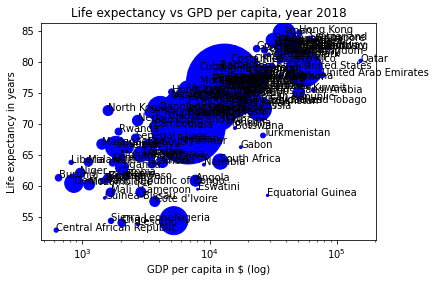

In [5]:
# Open figure + axis
fig, ax = plt.subplots()

# Plot datas
markersize = df['Population']
markersize = [int(i/(12**5)) for i in df['Population']]
ax.scatter(x=df['GDP per capita'],y=df['Life expectancy'],c='Blue',s=markersize)

# Set labels
ax.set_title('Life expectancy vs GPD per capita, year ' + str(year))
ax.set_xlabel('GDP per capita in $ (log)')
ax.set_ylabel('Life expectancy in years')

# Annotate points in axis with country name
for idx, row in df.iterrows():
    ax.annotate(row['Entity'], (row['GDP per capita'], row['Life expectancy']) )
    
# Scales & sizes
plt.xscale('log')
plt.rcParams["figure.figsize"] = (20, 15)

# Draw the graph
plt.show()

In [6]:
# Take 2018 data -> 167 points
my_data_2018 = my_data.drop(my_data[my_data.Year != 2018].index)
gdp_2018 = gdp.drop(gdp[gdp.Year != 2018].index)

In [7]:
print(my_data_2018.loc[:])
print(gdp_2018.loc[:])

            Entity      Code  Year  Life expectancy  GDP per capita  \
69     Afghanistan       AFG  2018           64.486     1934.555000   
588        Albania       ALB  2018           78.458    11104.166500   
850        Algeria       DZA  2018           76.693    14228.025000   
1556        Angola       AGO  2018           60.782     7771.441800   
2210     Argentina       ARG  2018           76.520    18556.383100   
...            ...       ...   ...              ...             ...   
58603      Vietnam       VNM  2018           75.317     6814.142300   
59099        World  OWID_WRL  2018           72.386    15212.415062   
59352        Yemen       YEM  2018           66.096     2284.889900   
59614       Zambia       ZMB  2018           63.510     3534.033700   
59874     Zimbabwe       ZWE  2018           61.195     1611.405200   

      145446-annotations    Population Continent  
69                   NaN  3.717192e+07       NaN  
588                  NaN  2.882735e+06       

In [8]:
# Merge our data on left to gdp per capita vs LE so we can have both GDP and GDP per capita
df_all_2018 = pd.merge(my_data_2018, gdp_2018, how='left')

In [9]:
df_all_2018

Entity      Code  Year  Life expectancy  GDP per capita  \
0    Afghanistan       AFG  2018           64.486     1934.555000   
1        Albania       ALB  2018           78.458    11104.166500   
2        Algeria       DZA  2018           76.693    14228.025000   
3         Angola       AGO  2018           60.782     7771.441800   
4      Argentina       ARG  2018           76.520    18556.383100   
..           ...       ...   ...              ...             ...   
162      Vietnam       VNM  2018           75.317     6814.142300   
163        World  OWID_WRL  2018           72.386    15212.415062   
164        Yemen       YEM  2018           66.096     2284.889900   
165       Zambia       ZMB  2018           63.510     3534.033700   
166     Zimbabwe       ZWE  2018           61.195     1611.405200   

    145446-annotations    Population Continent  GDP (constant 2010 US$)  
0                  NaN  3.717192e+07       NaN             2.098790e+10  
1                  NaN  2.882735e+06       NaN             1.454645e+10  
2                  NaN  4.222842e+07       NaN             2.007981e+11  
3                  NaN  3.080979e+07       NaN             9.963588e+10  
4                  NaN  4.436115e+07       NaN             4.471500e+11  
..                 ...           ...       ...                      ...  
162                NaN  9.554596e+07       NaN             1.876868e+11  
163                NaN  7.631091e+09       NaN             8.302670e+13  
164                NaN  2.849868e+07       NaN             1.803706e+10  
165                NaN  1.735171e+07       NaN             2.911926e+10  
166                NaN  1.443881e+07       NaN             1.861374e+10  

[167 rows x 9 columns]

In [10]:
#Which countries have a life expectancy higher than one standard de-viation above the mean ?
standard_deviation = my_data_2018[my_data_2018['Life expectancy'] > (my_data_2018['Life expectancy'].mean() + my_data_2018['Life expectancy'].std())]

In [11]:
my_data_2018['GDP per capita'].mean()

18936.927041087107

In [12]:
gdp_2018['GDP (constant 2010 US$)'].mean()

2794471394927.6445

In [13]:
my_data_2018['Life expectancy'].mean()

72.66111976047905

In [14]:
life_expectancty = my_data_2018.loc[:,'Life expectancy']
gdp = my_data_2018.loc[:, 'GDP per capita']

In [15]:
# Which countries have high life expectancy but have low GDP?
# We get 82 countries 
high_life_low_gdp = df_all_2018[(df_all_2018['GDP (constant 2010 US$)'] < (df_all_2018['GDP (constant 2010 US$)'].mean())) & (df_all_2018['Life expectancy'] > (df_all_2018['Life expectancy'].mean())) ]

In [16]:
# Which countries have high life expectancy but have low GDP?
# We get 5 countries
high_life_low_gdp = df_all_2018[(df_all_2018['GDP (constant 2010 US$)'] < (df_all_2018['GDP (constant 2010 US$)'].mean() - df_all_2018['GDP (constant 2010 US$)'].std()/8)) & (df_all_2018['Life expectancy'] > (df_all_2018['Life expectancy'].mean()+df_all_2018['Life expectancy'].std())) ]

In [17]:
high_life_low_gdp

Entity Code  Year  Life expectancy  GDP per capita  \
37       Cyprus  CYP  2018           80.828      27184.4166   
66      Iceland  ISL  2018           82.855      43438.5412   
88   Luxembourg  LUX  2018           82.102      57427.5003   
93        Malta  MLT  2018           82.376      32028.9124   
136    Slovenia  SVN  2018           81.172      29244.9198   

    145446-annotations  Population Continent  GDP (constant 2010 US$)  
37                 NaN   1189262.0       NaN             2.782287e+10  
66                 NaN    336712.0       NaN             1.822779e+10  
88                 NaN    604244.0       NaN             6.730121e+10  
93                 NaN    439255.0       NaN             1.392198e+10  
136                NaN   2077835.0       NaN             5.549841e+10

In [18]:
# Does every strong economy (normally indicated by GDP) have high life expectancy?
strong_economy_poor_le = df_all_2018[(df_all_2018['GDP per capita'] > (df_all_2018['GDP per capita'].mean() + df_all_2018['GDP per capita'].std()/8)) & (df_all_2018['Life expectancy'] < (df_all_2018['Life expectancy'].mean() - df_all_2018['Life expectancy'].std()/8))]

In [19]:
strong_economy_poor_le

Entity Code  Year  Life expectancy  GDP per capita  \
47   Equatorial Guinea  GNQ  2018           58.402       28528.953   
153       Turkmenistan  TKM  2018           68.073       26318.366   

    145446-annotations  Population Continent  GDP (constant 2010 US$)  
47                 NaN   1308966.0       NaN             1.328294e+10  
153                NaN   5850902.0       NaN             4.474737e+10

In [20]:
# 2 Extract Life satisfaction 
happiness = pd.read_csv('datasets/happiness-cantril-ladder.csv', delimiter=',')
extreme_poverty = pd.read_csv('datasets/extreme-poverty-headcount-ratio-vs-life-expectancy-at-birth.csv', delimiter=',')

happiness_2018 = happiness.drop(happiness[happiness.Year != 2018].index)
e_poverty_2018 = extreme_poverty.drop(extreme_poverty[extreme_poverty.Year != 2018].index)
         

In [21]:
e_poverty_2018

Entity      Code  Year  \
59                     Afghanistan       AFG  2018   
515                         Africa       NaN  2018   
577    Africa Eastern and Southern       NaN  2018   
637     Africa Western and Central       NaN  2018   
677                        Albania       ALB  2018   
...                            ...       ...   ...   
57946               Western Sahara       ESH  2018   
58008                        World  OWID_WRL  2018   
58247                        Yemen       YEM  2018   
58509                       Zambia       ZMB  2018   
58769                     Zimbabwe       ZWE  2018   

       $1.90 per day - share of population below poverty line  \
59                                                   NaN        
515                                                  NaN        
577                                                  NaN        
637                                                  NaN        
677                                              1.13801        
...                                                  ...        
57946                                                NaN        
58008                                                NaN        
58247                                           54.53728        
58509                                           58.19554        
58769                                           33.21659        

       Life expectancy at birth, total (years)  \
59                                   64.486000   
515                                        NaN   
577                                  63.648988   
637                                  57.762347   
677                                  78.458000   
...                                        ...   
57946                                      NaN   
58008                                72.568658   
58247                                66.096000   
58509                                63.510000   
58769                                61.195000   

       Total population (Gapminder, HYDE & UN) Continent  
59                                3.717192e+07       NaN  
515                               1.275921e+09       NaN  
577                                        NaN       NaN  
637                                        NaN       NaN  
677                               2.882735e+06       NaN  
...                                        ...       ...  
57946                             5.673960e+05       NaN  
58008                             7.631091e+09       NaN  
58247                             2.849868e+07       NaN  
58509                             1.735171e+07       NaN  
58769                             1.443881e+07       NaN  

[300 rows x 7 columns]

In [22]:
# Merge our data frame with happiness data and remove the NAN from the countries where hapinness is not 
e_poverty_2018.dropna(subset= ["$1.90 per day - share of population below poverty line"], inplace=True)
df_all_happiness_2018 = pd.merge( happiness_2018, df_all_2018, how='left')
df_all_happiness_poverty_2018 = pd.merge(df_all_happiness_2018, e_poverty_2018, how='left')
del df_all_happiness_poverty_2018["Life expectancy at birth, total (years)"] # erase duplicated columns
df_all_happiness_2018.dropna(subset = ["Life satisfaction in Cantril Ladder (World Happiness Report 2021)", "GDP per capita", "GDP (constant 2010 US$)"], inplace=True)

In [23]:
df_all_happiness_poverty_2018

Entity Code  Year  \
0    Afghanistan  AFG  2018   
1        Albania  ALB  2018   
2        Algeria  DZA  2018   
3      Argentina  ARG  2018   
4        Armenia  ARM  2018   
..           ...  ...   ...   
137    Venezuela  VEN  2018   
138      Vietnam  VNM  2018   
139        Yemen  YEM  2018   
140       Zambia  ZMB  2018   
141     Zimbabwe  ZWE  2018   

     Life satisfaction in Cantril Ladder (World Happiness Report 2021)  \
0                                                2.694                   
1                                                5.004                   
2                                                5.043                   
3                                                5.793                   
4                                                5.062                   
..                                                 ...                   
137                                              5.006                   
138                                              5.296                   
139                                              3.058                   
140                                              4.041                   
141                                              3.616                   

     Life expectancy  GDP per capita 145446-annotations  Population Continent  \
0             64.486       1934.5550                NaN  37171922.0       NaN   
1             78.458      11104.1665                NaN   2882735.0       NaN   
2             76.693      14228.0250                NaN  42228415.0       NaN   
3             76.520      18556.3831                NaN  44361150.0       NaN   
4             74.945      11454.4251                NaN   2951741.0       NaN   
..               ...             ...                ...         ...       ...   
137           72.128      10709.9506                NaN  28887117.0       NaN   
138           75.317       6814.1423                NaN  95545959.0       NaN   
139           66.096       2284.8899                NaN  28498683.0       NaN   
140           63.510       3534.0337                NaN  17351714.0       NaN   
141           61.195       1611.4052                NaN  14438812.0       NaN   

     GDP (constant 2010 US$)  \
0               2.098790e+10   
1               1.454645e+10   
2               2.007981e+11   
3               4.471500e+11   
4               1.300761e+10   
..                       ...   
137                      NaN   
138             1.876868e+11   
139             1.803706e+10   
140             2.911926e+10   
141             1.861374e+10   

     $1.90 per day - share of population below poverty line  \
0                                                  NaN        
1                                             1.138010        
2                                             0.322391        
3                                                  NaN        
4                                             1.409537        
..                                                 ...        
137                                                NaN        
138                                           1.801464        
139                                          54.537280        
140                                          58.195540        
141                                          33.216590        

     Total population (Gapminder, HYDE & UN)  
0                                        NaN  
1                                  2882735.0  
2                                 42228415.0  
3                                        NaN  
4                                  2951741.0  
..                                       ...  
137                                      NaN  
138                               95545959.0  
139                               28498683.0  
140                               17351714.0  
141                               14438812.0  

[142 rows x 12 columns]

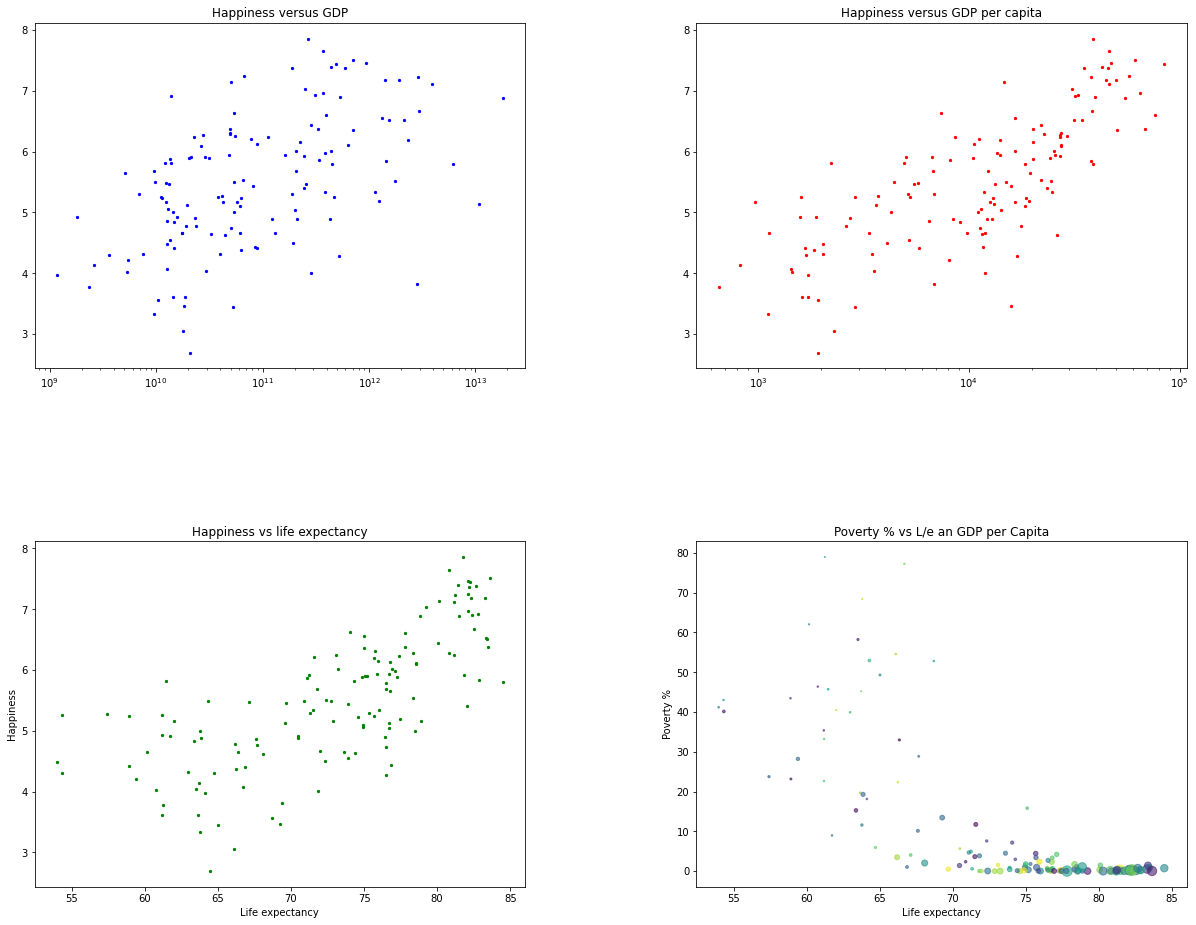

In [24]:
# 2.a Think of several meaningful questions : Which type of countries have higher hapinness ?

life_expectancty = df_all_happiness_2018.loc[:,'Life expectancy']
GDP = df_all_happiness_2018.loc[:,'GDP (constant 2010 US$)']
GDP_PER_CAPITA = df_all_happiness_2018.loc[:,'GDP per capita']
happiness = df_all_happiness_2018.loc[:, 'Life satisfaction in Cantril Ladder (World Happiness Report 2021)']

# Happiness correlated to GDP ? 
fig, axs = plt.subplots(2,2)

axs[0, 0].scatter(GDP, happiness, c='b', s=5)
#axs[0, 0].set(xlabel='GDP', ylabel = 'Happiness')
axs[0, 0].set_title('Happiness versus GDP')
axs[0, 0].set_xscale('log')

# Happiness correlated to GDP per capita ? 
axs[0, 1].scatter(GDP_PER_CAPITA, happiness, c='r', s=5)
#axs[0, 1].set(xlabel='GDP per capita', ylabel = 'Happiness')
axs[0, 1].set_title('Happiness versus GDP per capita')
axs[0, 1].set_xscale('log')

# Happiness correlated to L/e ?
axs[1, 0].scatter(life_expectancty, happiness, c='g', s=5)
axs[1, 0].set(xlabel='Life expectancy', ylabel = 'Happiness')
axs[1, 0].set_title('Happiness vs life expectancy')
#axs[1, 0].set_xscale('log')

# Poverty, gdp per capita correlated to happiness ?
df_all_happiness_poverty_2018.dropna(subset = ["$1.90 per day - share of population below poverty line"], inplace=True)
poverty = df_all_happiness_poverty_2018.loc[:, "$1.90 per day - share of population below poverty line"]
gdp_per_capita = df_all_happiness_poverty_2018.loc[:, "GDP per capita"]
life_expectancty = df_all_happiness_poverty_2018.loc[:,'Life expectancy']

happiness = df_all_happiness_poverty_2018.loc[:, "Life satisfaction in Cantril Ladder (World Happiness Report 2021)"]
happiness = happiness
colors = np.random.rand(len(happiness)) # to distinguish the circles
axs[1, 1].scatter(life_expectancty, poverty, s=gdp_per_capita/700, c=colors, alpha=0.6)
axs[1, 1].set(xlabel='Life expectancy', ylabel='Poverty %')
axs[1, 1].set_title('Poverty % vs L/e an GDP per Capita')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.35, 
                    hspace=0.5)


In [25]:
df_all_happiness_poverty_2018


Entity Code  Year  \
1       Albania  ALB  2018   
2       Algeria  DZA  2018   
4       Armenia  ARM  2018   
5     Australia  AUS  2018   
6       Austria  AUT  2018   
..          ...  ...   ...   
136  Uzbekistan  UZB  2018   
138     Vietnam  VNM  2018   
139       Yemen  YEM  2018   
140      Zambia  ZMB  2018   
141    Zimbabwe  ZWE  2018   

     Life satisfaction in Cantril Ladder (World Happiness Report 2021)  \
1                                                5.004                   
2                                                5.043                   
4                                                5.062                   
5                                                7.177                   
6                                                7.396                   
..                                                 ...                   
136                                              6.205                   
138                                              5.296                   
139                                              3.058                   
140                                              4.041                   
141                                              3.616                   

     Life expectancy  GDP per capita 145446-annotations  Population Continent  \
1             78.458      11104.1665                NaN   2882735.0       NaN   
2             76.693      14228.0250                NaN  42228415.0       NaN   
4             74.945      11454.4251                NaN   2951741.0       NaN   
5             83.281      49830.7993                NaN  24898153.0       NaN   
6             81.434      42988.0709                NaN   8891383.0       NaN   
..               ...             ...                ...         ...       ...   
136           71.573      11220.3702                NaN  32476232.0       NaN   
138           75.317       6814.1423                NaN  95545959.0       NaN   
139           66.096       2284.8899                NaN  28498683.0       NaN   
140           63.510       3534.0337                NaN  17351714.0       NaN   
141           61.195       1611.4052                NaN  14438812.0       NaN   

     GDP (constant 2010 US$)  \
1               1.454645e+10   
2               2.007981e+11   
4               1.300761e+10   
5               1.419817e+12   
6               4.424839e+11   
..                       ...   
136             7.822254e+10   
138             1.876868e+11   
139             1.803706e+10   
140             2.911926e+10   
141             1.861374e+10   

     $1.90 per day - share of population below poverty line  \
1                                             1.138010        
2                                             0.322391        
4                                             1.409537        
5                                             0.498484        
6                                             0.568358        
..                                                 ...        
136                                          11.729680        
138                                           1.801464        
139                                          54.537280        
140                                          58.195540        
141                                          33.216590        

     Total population (Gapminder, HYDE & UN)  
1                                  2882735.0  
2                                 42228415.0  
4                                  2951741.0  
5                                 24898153.0  
6                                  8891383.0  
..                                       ...  
136                               32476232.0  
138                               95545959.0  
139                               28498683.0  
140                               17351714.0  
141                               14438812.0  

[132 rows x 12 columns]